/tmp/ipykernel_1383/212764003.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


14


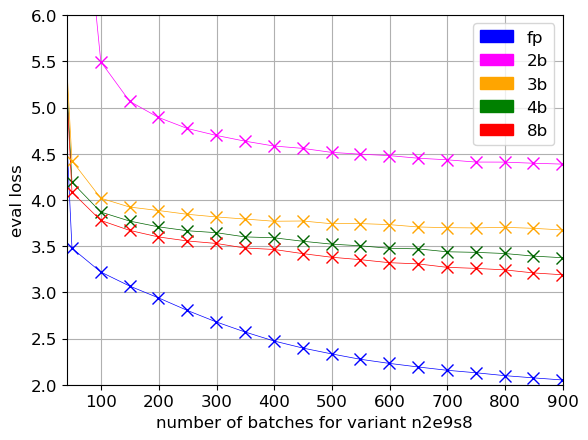

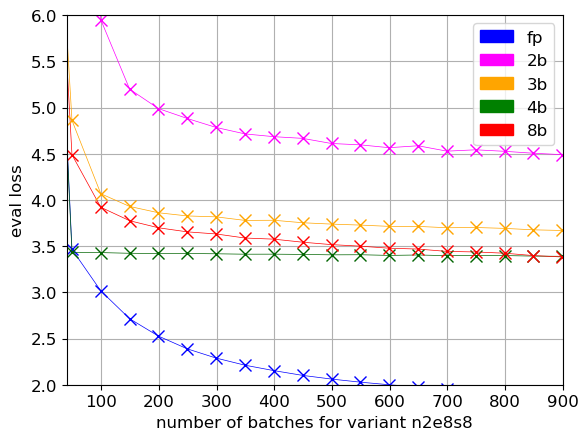

TypeError: 'NoneType' object is not subscriptable

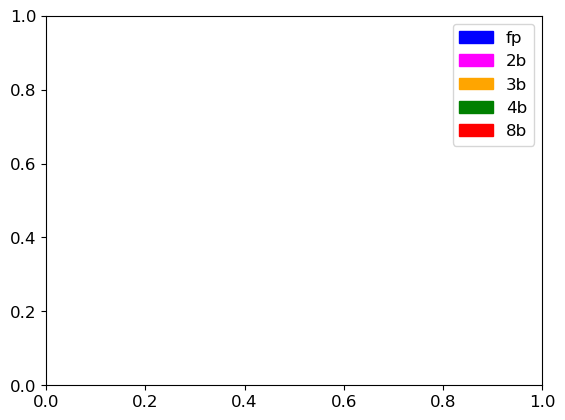

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import tomli
import matplotlib.patches as mpatches

l_width = 0.5
m_size = 8
smooth_curve = 10
smooth_curve_scale_correction = 0.98  # note this just an estimate
no_quant = [None]*4
q2b = [None]*4
q3b = [None]*4
q4b = [None]*4
q8b = [None]*4

BIGGER_SIZE = 12

n_nano    = "n0e7.5s7"
n_tiny    = "n1e8s7"
n_smaller = "n2e8s8"
n_small   = "n2e9s8"

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

aggregate_log_file = "/home/makuh001/eki/runs/bench/logs.toml"

with open(aggregate_log_file, "rb") as f:
    toml_dict = tomli.load(f)
    # toml_dict keys: run: [] : config, params, train_loss, eval_iter, eval_loss, eval_loss_last_train, checkpoints, export
    #print(toml_dict['runs'][0]['config'])
    print(len(toml_dict['runs']))
    for i, run in enumerate(toml_dict['runs']):
        #print(i, run['config'])
        if "BatchNormTranspose" in run['config']:
            if "n_head=2" in run['config'] and "n_layer=1" in run['config']:
                no_quant[3] = run
            if "n_head=2" in run['config'] and "n_layer=2" in run['config']:
                no_quant[2] = run
            if "n_head=4" in run['config']:
                no_quant[1] = run
            if "n_head=8" in run['config']:
                no_quant[0] = run
                
with open("new_logs2.toml", "rb") as f:
    toml_dict = tomli.load(f)
    # toml_dict keys: run: [] : config, params, train_loss, eval_iter, eval_loss, eval_loss_last_train, checkpoints, export
    
    for i, run in enumerate(toml_dict['runs']):
        if "n_head=2" in run['config'] and "n_layer=1" in run['config']:
            q2b[3] = run
        if "n_head=2" in run['config'] and "n_layer=2" in run['config']:
            q2b[2] = run
        if "n_head=4" in run['config']:
            q2b[1] = run
        if "n_head=8" in run['config']:
            q2b[0] = run

with open("new_logs3.toml", "rb") as f:
    toml_dict = tomli.load(f)
    # toml_dict keys: run: [] : config, params, train_loss, eval_iter, eval_loss, eval_loss_last_train, checkpoints, export
    
    for i, run in enumerate(toml_dict['runs']):
        if "n_head=2" in run['config'] and "n_layer=1" in run['config']:
            q3b[3] = run
        if "n_head=2" in run['config'] and "n_layer=2" in run['config']:
            q3b[2] = run
        if "n_head=4" in run['config']:
            q3b[1] = run
        if "n_head=8" in run['config']:
            q3b[0] = run
                
with open("new_logs4.toml", "rb") as f:
    toml_dict = tomli.load(f)
    # toml_dict keys: run: [] : config, params, train_loss, eval_iter, eval_loss, eval_loss_last_train, checkpoints, export
    
    for i, run in enumerate(toml_dict['runs']):
        if "n_head=2" in run['config'] and "n_layer=1" in run['config']:
            q4b[3] = run
        if "n_head=2" in run['config'] and "n_layer=2" in run['config']:
            q4b[2] = run
        if "n_head=4" in run['config']:
            q4b[1] = run
        if "n_head=8" in run['config']:
            q4b[0] = run
            
with open("new_logs8.toml", "rb") as f:
    toml_dict = tomli.load(f)
    # toml_dict keys: run: [] : config, params, train_loss, eval_iter, eval_loss, eval_loss_last_train, checkpoints, export
    
    for i, run in enumerate(toml_dict['runs']):
        if "n_head=2" in run['config'] and "n_layer=1" in run['config']:
            q8b[3] = run
        if "n_head=2" in run['config'] and "n_layer=2" in run['config']:
            q8b[2] = run
        if "n_head=4" in run['config']:
            q8b[1] = run
        if "n_head=8" in run['config']:
            q8b[0] = run

for i in range(4):
    #fig, axs = plt.subplots(ncols=1, nrows=3, layout="constrained", figsize=(7, 14))
    #ax = axs[0]
    plt.figure(i)
    no_quant_patch = mpatches.Patch(color='blue', label='fp')
    q4b_patch = mpatches.Patch(color='green', label='4b')
    q8b_patch = mpatches.Patch(color='red', label='8b')
    q2b_patch = mpatches.Patch(color='magenta', label='2b')
    q3b_patch = mpatches.Patch(color='orange', label='3b')
    plt.legend(handles=[no_quant_patch, q2b_patch, q3b_patch, q4b_patch, q8b_patch])
    
    t_c = 'lightblue'
    e_c = 'blue'
    run = no_quant[i]
    
    train_x_points = np.arange(len(run['train_loss']))
    train_y_points = np.array(run['train_loss'])*smooth_curve_scale_correction

    eval_x_points = train_x_points 
    eval_y_points = np.empty(train_y_points.size)
    eval_y_points[:] = 0
    eval_y_points = eval_y_points.astype(np.double)
   
    for j,l in enumerate(run['eval_loss']):
        eval_y_points[(j)*run['eval_iter'] - 1 ] = l
    eval_y_points[0] = 10
    eval_point_mask = np.argwhere(eval_y_points > 0.1)

    train_y_points = gaussian_filter1d(train_y_points, sigma=smooth_curve) # filter for smoothness

    #plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
    plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker='x',  linestyle='-',  markersize=m_size, linewidth=l_width)

    t_c = 'lightgreen'
    e_c = 'darkgreen'
    run = q4b[i]
    
    train_x_points = np.arange(len(run['train_loss']))
    train_y_points = np.array(run['train_loss'])*smooth_curve_scale_correction

    eval_x_points = train_x_points 
    eval_y_points = np.empty(train_y_points.size)
    eval_y_points[:] = 0
    eval_y_points = eval_y_points.astype(np.double)

    for j,l in enumerate(run['eval_loss']):
        eval_y_points[(j)*run['eval_iter'] - 1 ] = l
    eval_y_points[0] = 10
    eval_point_mask = np.argwhere(eval_y_points > 0.1)

    train_y_points = gaussian_filter1d(train_y_points, sigma=smooth_curve) # filter for smoothness

    #plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
    plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker='x',  linestyle='-',  markersize=m_size, linewidth=l_width)
    
    
    t_c = 'lightcoral'
    e_c = 'red'
    run = q8b[i]
    
    train_x_points = np.arange(len(run['train_loss']))
    train_y_points = np.array(run['train_loss'])*smooth_curve_scale_correction

    eval_x_points = train_x_points 
    eval_y_points = np.empty(train_y_points.size)
    eval_y_points[:] = 0
    eval_y_points = eval_y_points.astype(np.double)

    for j,l in enumerate(run['eval_loss']):
        eval_y_points[(j)*run['eval_iter'] - 1 ] = l
    eval_y_points[0] = 10
    eval_point_mask = np.argwhere(eval_y_points > 0.1)

    train_y_points = gaussian_filter1d(train_y_points, sigma=smooth_curve) # filter for smoothness

    #plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
    plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker='x',  linestyle='-',  markersize=m_size, linewidth=l_width)

    t_c = 'yellow'
    e_c = 'orange'
    run = q3b[i]
    
    train_x_points = np.arange(len(run['train_loss']))
    train_y_points = np.array(run['train_loss'])*smooth_curve_scale_correction

    eval_x_points = train_x_points 
    eval_y_points = np.empty(train_y_points.size)
    eval_y_points[:] = 0
    eval_y_points = eval_y_points.astype(np.double)

    for j,l in enumerate(run['eval_loss']):
        eval_y_points[(j)*run['eval_iter'] - 1 ] = l
    eval_y_points[0] = 10
    eval_point_mask = np.argwhere(eval_y_points > 0.1)

    train_y_points = gaussian_filter1d(train_y_points, sigma=smooth_curve) # filter for smoothness

    #plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
    plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker='x',  linestyle='-',  markersize=m_size, linewidth=l_width)
    
    
    t_c = 'plum'
    e_c = 'magenta'
    run = q2b[i]
    
    train_x_points = np.arange(len(run['train_loss']))
    train_y_points = np.array(run['train_loss'])*smooth_curve_scale_correction

    eval_x_points = train_x_points 
    eval_y_points = np.empty(train_y_points.size)
    eval_y_points[:] = 0
    eval_y_points = eval_y_points.astype(np.double)

    for j,l in enumerate(run['eval_loss']):
        eval_y_points[(j)*run['eval_iter'] - 1 ] = l
    eval_y_points[0] = 10
    eval_point_mask = np.argwhere(eval_y_points > 0.1)

    train_y_points = gaussian_filter1d(train_y_points, sigma=smooth_curve) # filter for smoothness

    #plt.plot(train_x_points, train_y_points, t_c, linestyle='-', marker='', markersize=1, linewidth=l_width) 
    plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], e_c, marker='x',  linestyle='-',  markersize=m_size, linewidth=l_width)
    
    if i == 0:
        plt.xlabel(f'number of batches for variant {n_small}')
    if i == 1:
        plt.xlabel(f'number of batches for variant {n_smaller}')
    if i == 2:
        plt.xlabel(f'number of batches for variant {n_tiny}')
    if i == 3:
        plt.xlabel(f'number of batches for variant {n_nano}')
    plt.ylabel("eval loss")
    plt.ylim(2, 6)
    display_num_steps = 18
    iter_display_limit = run['eval_iter'] * display_num_steps
    plt.xlim(40, iter_display_limit)
    plt.grid()

    plt.show()
        